# Shritesh_Jagtap_Flipkart_Review_Analysis

In [1]:
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # 
import scipy.sparse
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data
from sklearn.cluster import KMeans                                  # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import plot_confusion_matrix                   # plot of confusion matrix
from sklearn.metrics import mean_squared_error           

In [2]:
flipkart_data= pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")
flipkart_data

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


In [3]:
flipkart_data['Rating'].value_counts()

5    1382
4     552
1     184
3     140
2      46
Name: Rating, dtype: int64

In [4]:
flipkart_data.isnull().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

## DATA CLEANING

In [5]:
data=flipkart_data.copy()

In [6]:
import re
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text) 
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    
    text = text.lower()
    return text

In [7]:
data["Review"] = data["Review"].apply(cleaning)

In [8]:
data.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best under k great performancei got it for aro...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfomence,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,my wife is so happy and best product,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop with new amazing features ...,5


In [9]:
a=[]
for x in data['Rating']: 
  if x>3:
    x='Pos'
    a.append(x)
  elif x==3:
    x='Neutral'
    a.append(x)
  else:
    x='Neg'
    a.append(x)

In [10]:
data['Sentiments']=a

In [11]:
data.head()

,Product_name,Review,Rating,Sentiments
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best under k great performancei got it for aro...,5,Pos
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfomence,5,Pos
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great performance but usually it has also that...,5,Pos
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,my wife is so happy and best product,5,Pos
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop with new amazing features ...,5,Pos


In [12]:
data['Sentiments'].value_counts()

Pos        1934
Neg         230
Neutral     140
Name: Sentiments, dtype: int64

## VADER SENTIMENT ANALYSIS

In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
res2 = {}
t = 0
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['Review']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/2304 [00:00<?, ?it/s]

In [16]:
j = pd.DataFrame(res2).T
j

,neg,neu,pos,compound
0,0.074,0.608,0.319,0.9579
1,0.000,0.256,0.744,0.4404
2,0.000,0.881,0.119,0.5789
3,0.000,0.395,0.605,0.8808
4,0.000,0.533,0.467,0.8360
...,...,...,...,...
2299,0.000,0.631,0.369,0.6249
2300,0.000,0.745,0.255,0.6249
2301,0.000,0.000,1.000,0.6249
2302,0.000,1.000,0.000,0.0000


In [17]:
Main_data = pd.concat([data, j], axis = 1)

In [18]:
Main_data.insert(2, 'Class_reviews', np.nan)
Main_data.loc[Main_data['compound']>=0.05, 'Class_reviews'] = 'pos'
Main_data.loc[Main_data['compound']<=-0.05, 'Class_reviews'] = 'neg'
Main_data.loc[((Main_data['compound'] > -0.05) & (Main_data['compound'] < 0.05)), 'Class_reviews'] = 'neutral'

In [19]:
Main_data.head()

,Product_name,Review,Class_reviews,Rating,Sentiments,neg,neu,pos,compound
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best under k great performancei got it for aro...,pos,5,Pos,0.074,0.608,0.319,0.9579
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfomence,pos,5,Pos,0.000,0.256,0.744,0.4404
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great performance but usually it has also that...,pos,5,Pos,0.000,0.881,0.119,0.5789
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,my wife is so happy and best product,pos,5,Pos,0.000,0.395,0.605,0.8808
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop with new amazing features ...,pos,5,Pos,0.000,0.533,0.467,0.8360


In [20]:
Main_data.isnull().sum()

Product_name     0
Review           0
Class_reviews    0
Rating           0
Sentiments       0
neg              0
neu              0
pos              0
compound         0
dtype: int64

In [21]:
#Main_data.to_csv('Flipkart_Sentiment_Analysis.csv')

In [22]:
Main_data['Class_reviews'].value_counts()

pos        2005
neg         220
neutral      79
Name: Class_reviews, dtype: int64

## Word Cloud

In [23]:
! pip install wordcloud

In [24]:
from wordcloud import WordCloud, STOPWORDS                          

In [25]:
# Getting stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# applying stopword function on review
Main_data['Review'] = Main_data['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [27]:
# For WordCloud
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 50,
    stopwords = stopwords,
    scale = 3).generate(str(Main_data["Review"]))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [28]:
neg=Main_data[Main_data["Class_reviews"] == "neg"]["Review"]
pos=Main_data[Main_data["Class_reviews"] == "pos"]["Review"]
neu=Main_data[Main_data["Class_reviews"] == "neutral"]["Review"]

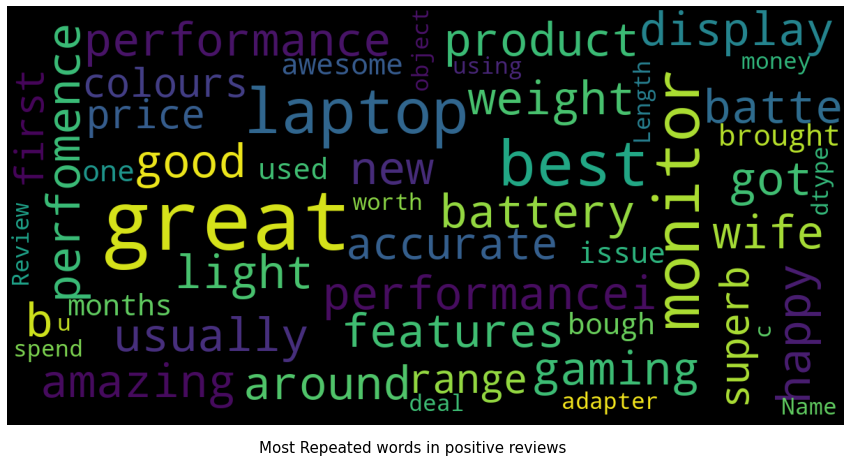

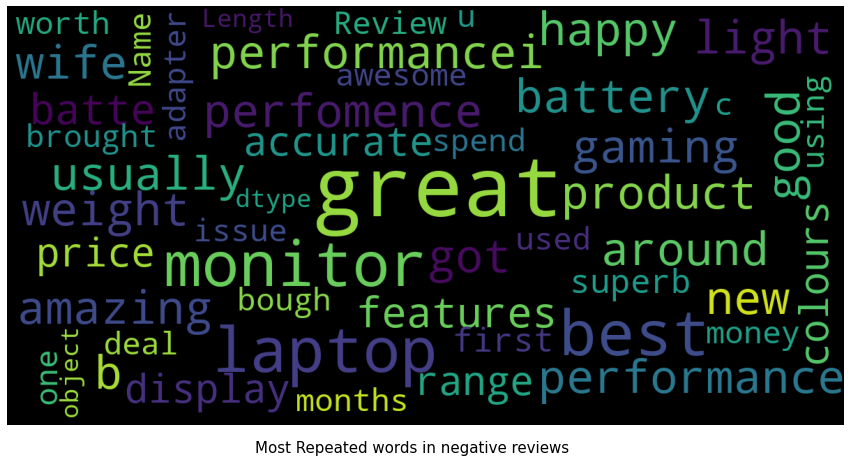

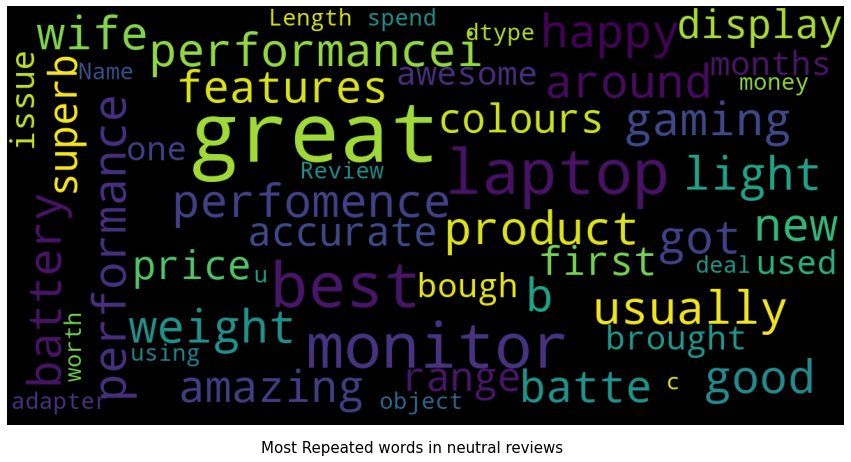

In [29]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

In [30]:
# Getting BIGRAM
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)   # converting a text documents to a matrix of token counts.      
    bag_of_words = vec.transform(corpus)                                         # Transforming the corpus into numbers
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]     # it provides a dictionary with the mapping of the word item index 
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

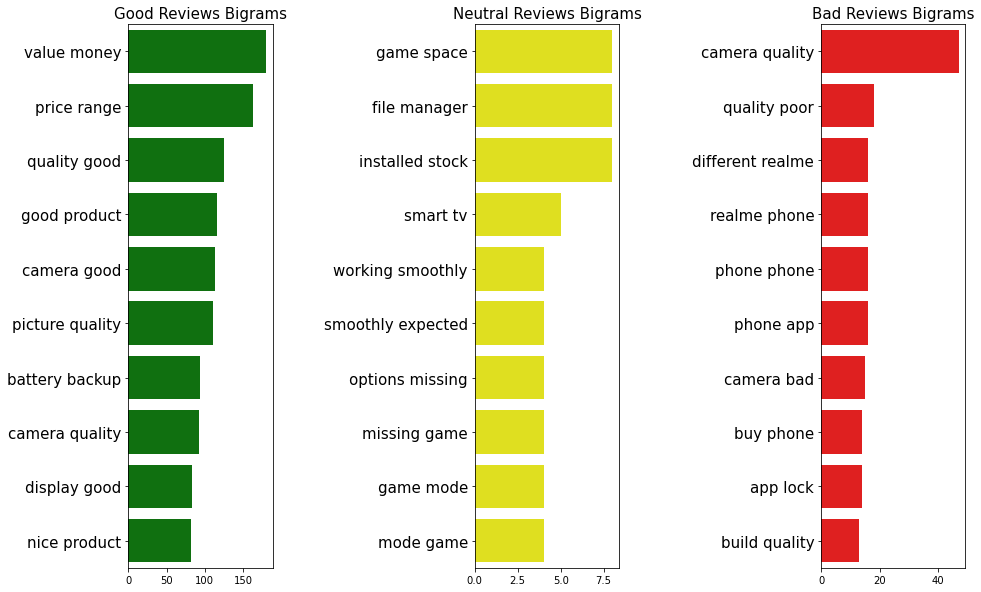

In [31]:
def n_gram_plot(Main_data,title,color):                            # Creating n_gram_plot function
    x=[x[0] for x in Main_data]
    y=[x[1] for x in Main_data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 10)                  # Calling get_top_n_bigram for pos columns
common_words_neutral = get_top_n_bigram(neu, 10)               # Calling get_top_n_bigram for neu columns
common_words_bad = get_top_n_bigram(neg, 10)                   # Calling get_top_n_bigram for neg columns

# bigram plot using function above
plt.figure(figsize=(15,10))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')                  # Calling n_gram_plot for pos 
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')           # Calling n_gram_plot for pos
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')                      # Calling n_gram_plot for pos
plt.show()

### From the above plots we can see that most occuring bigram words in the text reveiws
Based on the negative sentiment words the reasons for negative reviews are \
camera quality \
quality poor \
realme phone

## MACHINE LEARNING

In [32]:
X = Main_data['Review']
Y = Main_data['Class_reviews']

In [33]:
Y.value_counts()

pos        2005
neg         220
neutral      79
Name: Class_reviews, dtype: int64

In [34]:
Y = LabelEncoder().fit_transform(Y)
Y

array([2, 2, 2, ..., 2, 1, 2])

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [36]:
%%time
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.1, min_df = 1,
                             use_idf = True, smooth_idf = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

CPU times: total: 109 ms
Wall time: 95.8 ms


In [37]:
# Making and Fitting the Model

model = LogisticRegression(multi_class = 'ovr').fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [38]:
%%time
print(classification_report(Y_test, y_pred, target_names = ['neg', 'neu', 'pos']))

              precision    recall  f1-score   support

         neg       0.96      0.46      0.62        50
         neu       1.00      0.08      0.15        12
         pos       0.91      1.00      0.95       399

    accuracy                           0.92       461
   macro avg       0.96      0.51      0.58       461
weighted avg       0.92      0.92      0.90       461

CPU times: total: 0 ns
Wall time: 6.98 ms


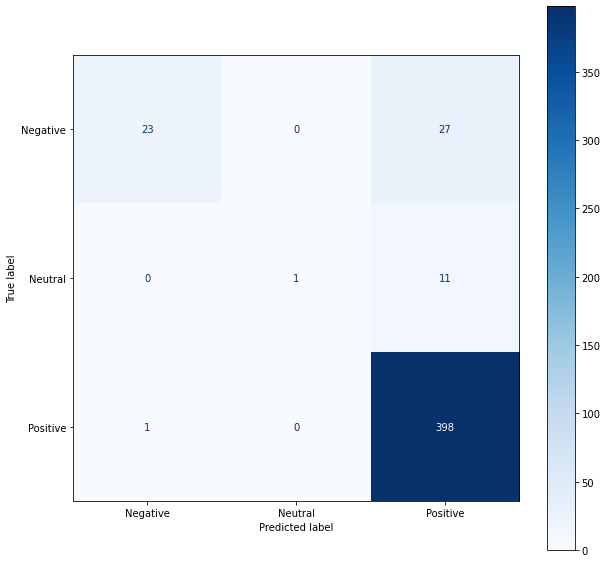

In [39]:
color = 'white'
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, display_labels = ['Negative','Neutral','Positive'], ax = ax)
plt.show()

### There are High Positive Reviews

## TOP and BOTTOM Product

In [40]:
p= Main_data.copy()

In [41]:
product=pd.crosstab(p['Product_name'], p['Class_reviews'], rownames=['Product_name'], colnames=['Class_reviews'])
product=product.sort_values(by=['neg'],ascending=False)
product_neg=product[product['neg']>5]
product_neg

Class_reviews,neg,neutral,pos
Product_name,,,
"realme C21Y (Cross Black, 32 GB) (3 GB RAM)",10,2,8
"realme C21Y (Cross Blue, 32 GB) (3 GB RAM)",10,2,8
"realme C25_Y (Metal Grey, 64 GB) (4 GB RAM)",8,0,12
"realme C25_Y (Metal Grey, 128 GB) (4 GB RAM)",8,0,12
"realme C25_Y (Glacier Blue, 64 GB) (4 GB RAM)",8,0,12
"realme C25_Y (Glacier Blue, 128 GB) (4 GB RAM)",8,0,12
"realme C21Y (Cross Black, 64 GB) (4 GB RAM)",6,4,10
"realme C21Y (Cross Blue, 64 GB) (4 GB RAM)",6,4,10


### The Above Table contains Bottom Product

In [42]:
product=pd.crosstab(p['Product_name'], p['Class_reviews'], rownames=['Product_name'], colnames=['Class_reviews'])
product=product.sort_values(by=['neg'],ascending=False)
product_pos=product[product['pos']>8]
product_pos

Class_reviews,neg,neutral,pos
Product_name,,,
"realme C25_Y (Metal Grey, 64 GB) (4 GB RAM)",8,0,12
"realme C25_Y (Metal Grey, 128 GB) (4 GB RAM)",8,0,12
"realme C25_Y (Glacier Blue, 64 GB) (4 GB RAM)",8,0,12
"realme C25_Y (Glacier Blue, 128 GB) (4 GB RAM)",8,0,12
"realme C21Y (Cross Black, 64 GB) (4 GB RAM)",6,4,10
...,...,...,...
"SAMSUNG Galaxy F12 (Sea Green, 128 GB) (4 GB RAM)",0,0,10
"SAMSUNG Galaxy F12 (Celestial Black, 64 GB) (4 GB RAM)",0,0,10
"SAMSUNG Galaxy A22 5G (Mint, 128 GB) (6 GB RAM)",0,0,10


### Above Table contains Top Products

## PRODUCT RECOMMENDATION SYSTEM

In [43]:
new_df=Main_data.groupby("Product_name").filter(lambda x:x['Rating'].count() >=1)
new_df

,Product_name,Review,Class_reviews,Rating,Sentiments,neg,neu,pos,compound
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best k great performancei got around battery b...,pos,5,Pos,0.074,0.608,0.319,0.9579
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfomence,pos,5,Pos,0.000,0.256,0.744,0.4404
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great performance usually also gaming laptop i...,pos,5,Pos,0.000,0.881,0.119,0.5789
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,wife happy best product,pos,5,Pos,0.000,0.395,0.605,0.8808
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop new amazing features batte...,pos,5,Pos,0.000,0.533,0.467,0.8360
...,...,...,...,...,...,...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,great display accurate colours price range,pos,5,Pos,0.000,0.631,0.369,0.6249
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,superb monitor first brought used months bough...,pos,5,Pos,0.000,0.745,0.255,0.6249
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,awesome,pos,5,Pos,0.000,0.000,1.000,0.6249
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,one issue adapter,neutral,5,Pos,0.000,1.000,0.000,0.0000


In [44]:
ratings_matrix = new_df.pivot_table(values='Rating', index='Product_name', columns='Class_reviews', fill_value=0)
ratings_matrix.head()

Class_reviews,neg,neutral,pos
Product_name,,,
"APPLE iPhone SE (Red, 128 GB)",0.0,0.0,4.6
"APPLE iPhone SE (Red, 64 GB)",0.0,0.0,4.6
"ASUS Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) X515EA-EJ312WS Thin and Light Laptop (15.6 inch, Transparent Silver, 1.80 kg, With MS Office)",1.0,0.0,5.0
"ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/256 GB SSD/Windows 10 Home) M515DA-BQ322TS Thin and Light Laptop (15.6 inch, Transparent Silver, 1.80 kg, With MS Office)",0.0,0.0,4.8
"ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS Thin and Light Laptop (15.6 inch, Transparent Silver, 1.80 kg, With MS Office)",0.0,0.0,4.2


In [45]:
print('Shape of the pivot table: ', ratings_matrix.shape)

Shape of the pivot table:  (231, 3)


In [46]:
X = ratings_matrix

In [47]:
X.index

Index(['APPLE iPhone SE (Red, 128 GB)', 'APPLE iPhone SE (Red, 64 GB)',
       'ASUS Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) X515EA-EJ312WS Thin and Light Laptop  (15.6 inch, Transparent Silver, 1.80 kg, With MS Office)',
       'ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/256 GB SSD/Windows 10 Home) M515DA-BQ322TS Thin and Light Laptop  (15.6 inch, Transparent Silver, 1.80 kg, With MS Office)',
       'ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS Thin and Light Laptop  (15.6 inch, Transparent Silver, 1.80 kg, With MS Office)',
       'ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 GB/256 GB SSD/Windows 10 Home) X515EA-EJ302TS Thin and Light Laptop  (15.6 inch, Transparent Silver, 1.80 kg, With MS Office)',
       'BenQ 22 inch Full HD LED Backlit VA Panel Monitor (GW2280)  (Response Time: 5 ms, 60 Hz Refresh Rate)',
       'BenQ 27 inch Full HD LED Backlit IPS Panel Monitor (GW2780)  (Response Time: 5 ms, 60 Hz Refresh Rate)'

In [48]:
%%time
from sklearn.decomposition import TruncatedSVD       # used for dimensionality reduction
SVD = TruncatedSVD(n_components=2)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

CPU times: total: 62.5 ms
Wall time: 12.9 ms


(231, 2)

In [49]:
%%time
correlation_matrix = np.corrcoef(decomposed_matrix)        # Return Pearson product-moment correlation coefficients.
correlation_matrix.shape

CPU times: total: 0 ns
Wall time: 958 µs


(231, 231)

In [50]:
def recommend(s):
    l = list(X.index)
    h = l.index(s)
    i=X.index[h]
    correlation_product_ID = correlation_matrix[h]
    Recommend = list(X.index[correlation_product_ID > 0.5])
    Recommend.remove(i)
    print(Recommend[0:5])
     

In [51]:
s = 'APPLE iPhone SE (Red, 128 GB)'

In [52]:
recommend(s)

['APPLE iPhone SE (Red, 64 GB)', 'ASUS Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) X515EA-EJ312WS Thin and Light Laptop\xa0\xa0(15.6 inch, Transparent Silver, 1.80 kg, With MS Office)', 'ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/256 GB SSD/Windows 10 Home) M515DA-BQ322TS Thin and Light Laptop\xa0\xa0(15.6 inch, Transparent Silver, 1.80 kg, With MS Office)', 'ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS Thin and Light Laptop\xa0\xa0(15.6 inch, Transparent Silver, 1.80 kg, With MS Office)', 'ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 GB/256 GB SSD/Windows 10 Home) X515EA-EJ302TS Thin and Light Laptop\xa0\xa0(15.6 inch, Transparent Silver, 1.80 kg, With MS Office)']


### Conclusion
- SENTIMENTAL ANALYSIS 


Model is able to Automate Sentiment Predictions \
Positive Sentiments are Higher than Negative and Neutral Sentiments 
- CROSS TAB 

By Cross Tab Top and Bottom Products are found 

- PRODUCT RECOMMENDATION 

Model is able to recommend related products based on Ratings 